### Sensitivy Analysis for Linear Regression

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm

### Setup dataframe and model

In [151]:
# Load dataframe
df = pd.read_csv('data/merged_df_for_causality.csv', parse_dates=['Date'])
df.dropna(subset=['ipc'], inplace=True)

X = df[['total_conflict#','ndvi_anom', 'cropland_pct', 'pop', 'rain_anom', 'conflict_1#', 'conflict_2#']].copy()
y = df['ipc'].copy()

# Load model
if os.path.exists('regression_model'):
    model = sm.load('regression_model')
else:
    # Create new model, based on Regression_analysis file, if there is none present
    X = sm.add_constant(X)
    
    model = sm.OLS(y,X).fit()
    model.save("regression_model")


### Change a variable for the sensitivity analysis

In [152]:
# Initialization of variables
column_name = "total_conflict#"

# Get min and max values of that column
min_value = X[column_name].min()
max_value = X[column_name].max()

# Fix that column to a single value
X.loc[X.index, column_name] = max_value-min_value
# print(X[column_name])

# Make a new prediction
y_pred = model.predict(X)

### Plot change

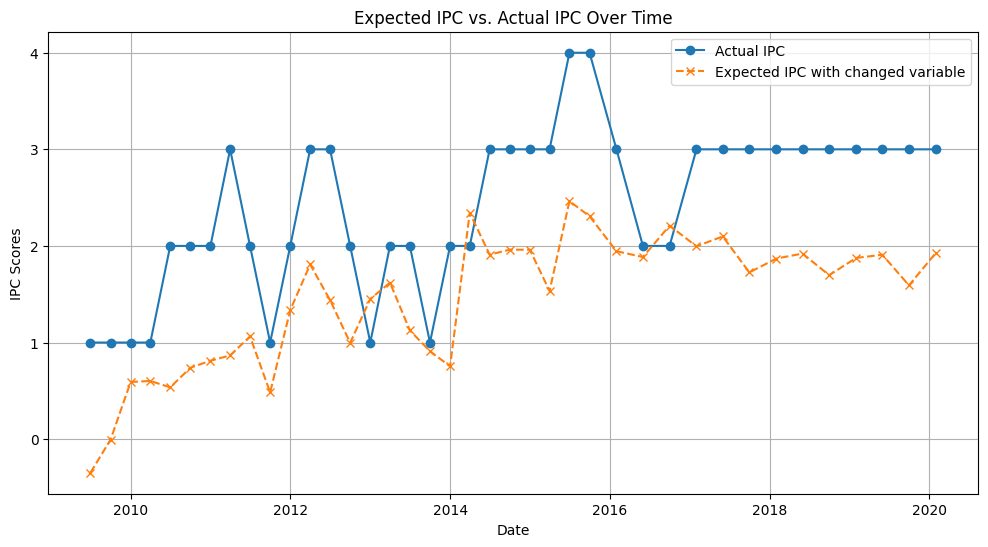

In [153]:
# Create a time series plot to compare expected vs. actual IPC scores
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, label='Actual IPC', linestyle='-', marker='o')
plt.plot(df['Date'], y_pred, label='Expected IPC with changed variable', linestyle='--', marker='x')

# Add labels, a legend, and a title
plt.xlabel('Date')
plt.ylabel('IPC Scores')
plt.title('Expected IPC vs. Actual IPC Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()